In [0]:
import pandas as pd
file_path ="/Volumes/workspace/default/netflix/netflix_cleaned.csv"
df = pd.read_csv(file_path)
df.head(7)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,Tv Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,Tv Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,Tv Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,Tv Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [0]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
def content_length_category(row):
    if "min" in row["duration"]:
        minutes = int(row["duration"].split()[0])
        if minutes < 60:
            return "Short"
        elif 60 <= minutes < 120:
            return "Medium"
        else:
            return "Long"
    elif "Season" in row["duration"]:
        num_seasons = int(row["duration"].split()[0])
        if num_seasons == 1:
            return "Mini-Series"
        elif num_seasons <= 3:
            return "Regular Series"
        else:
            return "Long Series"
    else:
        return "Unknown"

df["Content_Length_Category"] = df.apply(content_length_category, axis=1)
df.head(5)



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Content_Length_Category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Medium
1,s2,Tv Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Regular Series
2,s3,Tv Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Mini-Series
3,s4,Tv Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Mini-Series
4,s5,Tv Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Regular Series


In [0]:
def title_length_category(title):
    length = len(title)
    if length < 10:
        return "Short Title"
    elif length < 20:
        return "Medium Title"
    else:
        return "Long Title"

df["Title_Length_Category"] = df["title"].apply(title_length_category)
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Content_Length_Category,Title_Length_Category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Medium,Long Title
1,s2,Tv Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Regular Series,Medium Title
2,s3,Tv Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Mini-Series,Short Title
3,s4,Tv Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Mini-Series,Long Title
4,s5,Tv Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Regular Series,Medium Title


In [0]:
def original_vs_licensed(row):
    if "United States" in row["country"]:
        return "Original"
    else:
        return "Licensed"

df["Original_vs_Licensed"] = df.apply(original_vs_licensed, axis=1)
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Content_Length_Category,Title_Length_Category,Original_vs_Licensed
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Medium,Long Title,Original
1,s2,Tv Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Regular Series,Medium Title,Licensed
2,s3,Tv Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Mini-Series,Short Title,Licensed
3,s4,Tv Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Mini-Series,Long Title,Licensed
4,s5,Tv Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Regular Series,Medium Title,Licensed
5,s6,Tv Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,Mini-Series,Medium Title,Licensed
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Medium,Long Title,Licensed
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Long,Short Title,Original
8,s9,Tv Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,Long Series,Long Title,Licensed
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Medium,Medium Title,Original


In [0]:
def audience_age_group(rating):
    kids = ["G", "TV-Y", "TV-G"]
    teens = ["PG", "PG-13", "TV-PG", "TV-14"]
    adults = ["R", "TV-MA", "NC-17"]
    
    if rating in kids:
        return "Kids"
    elif rating in teens:
        return "Teens"
    elif rating in adults:
        return "Adults"
    else:
        return "General"

df["Audience_Age_Group"] = df["rating"].apply(audience_age_group)
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Content_Length_Category,Title_Length_Category,Original_vs_Licensed,Audience_Age_Group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Medium,Long Title,Original,Teens
1,s2,Tv Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Regular Series,Medium Title,Licensed,Adults
2,s3,Tv Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Mini-Series,Short Title,Licensed,Adults
3,s4,Tv Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Mini-Series,Long Title,Licensed,Adults
4,s5,Tv Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Regular Series,Medium Title,Licensed,Adults


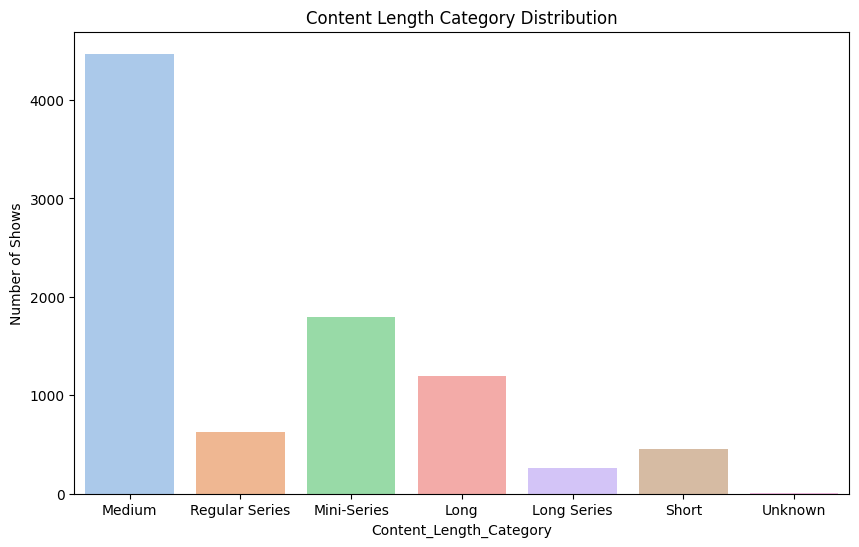

In [0]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Content_Length_Category", hue="Content_Length_Category", palette="pastel", legend=False)
plt.title("Content Length Category Distribution")
plt.ylabel("Number of Shows")
plt.show()


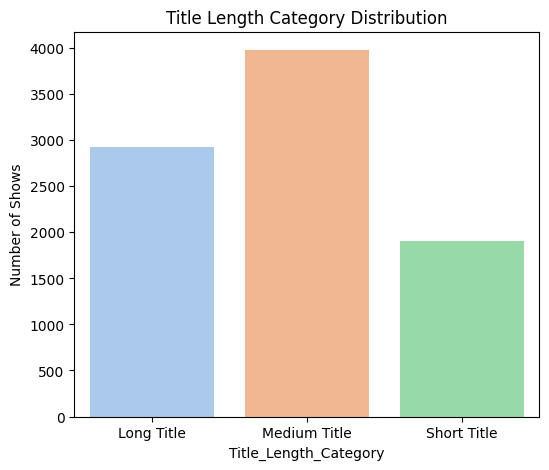

In [0]:
plt.figure(figsize=(6, 5))
sns.countplot(
    data=df,
    x="Title_Length_Category",
    hue="Title_Length_Category",  
    palette="pastel",
    legend=False                  
)
plt.title("Title Length Category Distribution")
plt.ylabel("Number of Shows")
plt.show()



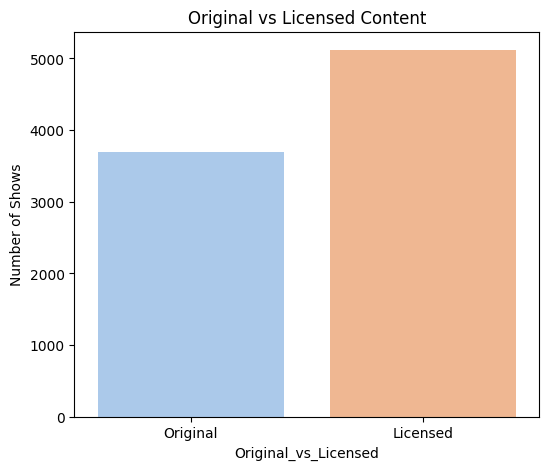

In [0]:
plt.figure(figsize=(6,5))
sns.countplot(
    data=df,
    x="Original_vs_Licensed",
    hue="Original_vs_Licensed",  
    palette="pastel",
    legend=False                
)
plt.title("Original vs Licensed Content")
plt.ylabel("Number of Shows")
plt.show()


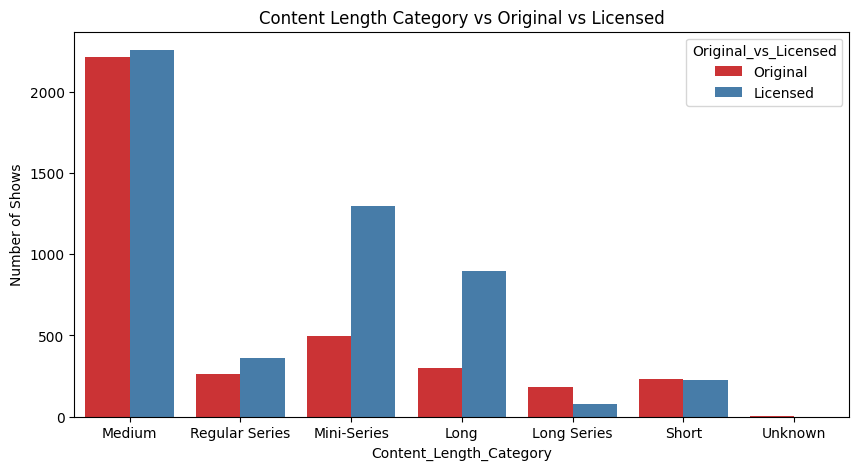

In [0]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Content_Length_Category", hue="Original_vs_Licensed", palette="Set1")
plt.title("Content Length Category vs Original vs Licensed")
plt.ylabel("Number of Shows")
plt.show()

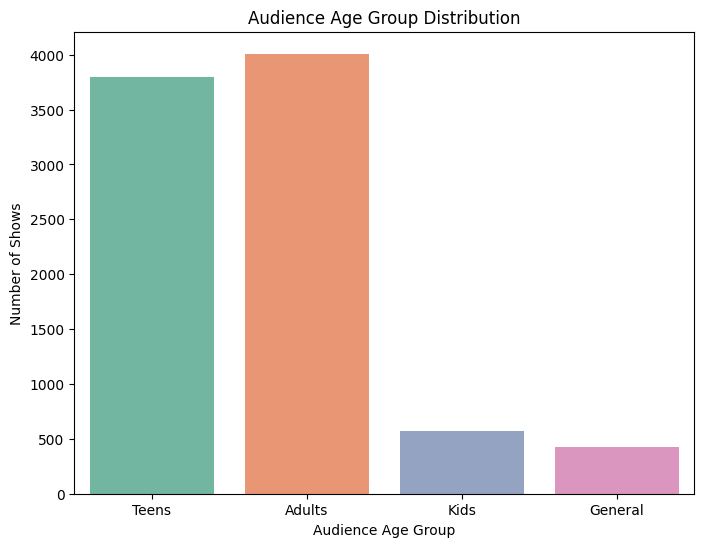

In [0]:
plt.figure(figsize=(8,6))
sns.countplot(
    data=df,
    x="Audience_Age_Group",
    hue="Audience_Age_Group",  
    palette="Set2",
    legend=False              
)
plt.title("Audience Age Group Distribution")
plt.xlabel("Audience Age Group")
plt.ylabel("Number of Shows")
plt.show()


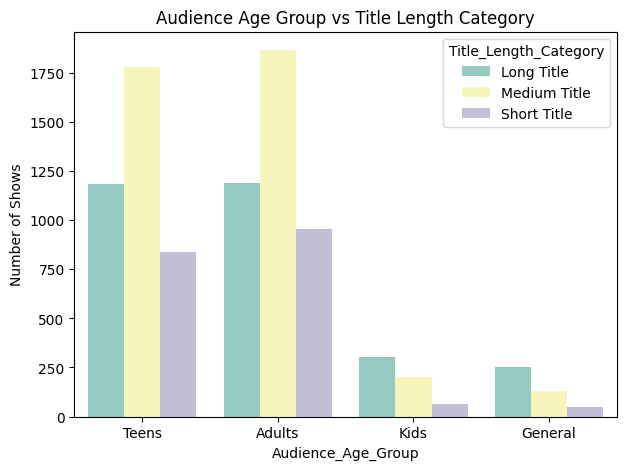

In [0]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Audience_Age_Group", hue="Title_Length_Category", palette="Set3")
plt.title("Audience Age Group vs Title Length Category")
plt.ylabel("Number of Shows")
plt.show()

In [0]:
print(df.columns)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Content_Length_Category', 'Title_Length_Category',
       'Original_vs_Licensed', 'Audience_Age_Group'],
      dtype='object')
